### Import Modules and Data

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import KFold, train_test_split
from sklearn.neural_network import MLPRegressor

In [3]:
df_ger = pd.read_csv("data/preprocessed_survey_results_encoded.csv")

#### Helper Functions


In [4]:
def calc_scores(estimators, x_test, y_test) -> (list, list, list, list, list):
    """
    Calculates the scores from multiple estimators. For example of cross validations.

    :param estimators: list of estimators
    :param x_test: x test split
    :param y_test: y test split
    :return: quadruple of list of the scores
    """
    r2_scores = []
    mae_scores =  []
    mape_scores = []
    rmse_scores = []
    max_scores = []
    for estimator in estimators:
        predictions = estimator.predict(x_test)
        r2_scores.append(metrics.r2_score(y_test, predictions))
        mae_scores.append(metrics.mean_absolute_error(y_test, predictions))
        mape_scores.append(metrics.mean_absolute_percentage_error(y_test, predictions))
        rmse_scores.append(np.sqrt(metrics.mean_squared_error(y_test, predictions)))
        max_scores.append(metrics.max_error(y_test, predictions))

    return r2_scores, mae_scores, mape_scores, rmse_scores, max_scores

## Multi-Layer-Perceptron

#### Divide Dataset into Train and Test Data

In [5]:
x = df_ger[['YearsCode', 'Age', 'OrgSize', 'in-person', 'remote']]

# x = df_reg[['YearsCode', 'OrgSize', 'Age', 'Bachelor’s degree','Doctoral degree', 'Master’s degree', 'Primary school','Professional degree', 'Secondary school', 'University courses','in-person', 'remote']]

# x = df_reg[['YearsCode', 'OrgSize', 'Age', 'Bachelor’s degree','Doctoral degree', 'Master’s degree', 'Primary school','Professional degree', 'Secondary school', 'University courses','in-person', 'remote', 'APL', 'Assembly', 'Bash/Shell', 'C', 'C#','C++', 'COBOL', 'Clojure', 'Crystal', 'Dart', 'Delphi', 'Elixir','Erlang', 'F#', 'Fortran', 'Go', 'Groovy', 'HTML/CSS', 'Haskell','Java', 'JavaScript', 'Julia', 'Kotlin', 'LISP', 'Lua', 'MATLAB','OCaml', 'Objective-C', 'PHP', 'Perl', 'PowerShell', 'Python', 'R','Ruby', 'Rust', 'SAS', 'SQL', 'Scala', 'Solidity', 'Swift','TypeScript', 'VBA']]

# x = df_reg[['YearsCode', 'OrgSize', 'Age', 'Bachelor’s degree','Doctoral degree', 'Master’s degree', 'Primary school','Professional degree', 'Secondary school', 'University courses','in-person', 'remote', 'APL', 'Assembly', 'Bash/Shell', 'C', 'C#','C++', 'COBOL', 'Clojure', 'Crystal', 'Dart', 'Delphi', 'Elixir','Erlang', 'F#', 'Fortran', 'Go', 'Groovy', 'HTML/CSS', 'Haskell','Java', 'JavaScript', 'Julia', 'Kotlin', 'LISP', 'Lua', 'MATLAB','OCaml', 'Objective-C', 'PHP', 'Perl', 'PowerShell', 'Python', 'R','Ruby', 'Rust', 'SAS', 'SQL', 'Scala', 'Solidity', 'Swift','TypeScript', 'VBA', 'Academic researcher', 'Blockchain','Cloud infrastructure engineer', 'Data or business analyst','Data scientist or machine learning specialist','Database administrator', 'Designer', 'DevOps specialist','Developer, QA or test', 'Developer, back-end','Developer, desktop or enterprise applications','Developer, embedded applications or devices', 'Developer, front-end','Developer, full-stack', 'Developer, game or graphics','Developer, mobile', 'Educator', 'Engineer, data','Engineer, site reliability', 'Engineering manager','Marketing or sales professional', 'Other (please specify):','Product manager', 'Project manager', 'Scientist','Security professional', 'Senior Executive (C-Suite, VP, etc.)','Student', 'System administrator']]

y = df_ger['Salary']

# scaler = MinMaxScaler(feature_range=(0,1))
# scaler.fit(x)
# x = pd.DataFrame(scaler.transform(x), index=x.index, columns=x.columns)

# normalizer = Normalizer()
# normalizer.fit(x)
# x = pd.DataFrame(normalizer.transform(x), index=x.index, columns=x.columns)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1000)
folds = KFold(n_splits=10, shuffle=True, random_state=100)

#### Layer Size Example 1

Samples: [52309.0076311 52309.0076311 52309.0076311 52309.0076311 52309.0076311]
R2:      -0.913
MAE:     21046
MAPE:    0.252
RMSE:    28070
MAX:     86327


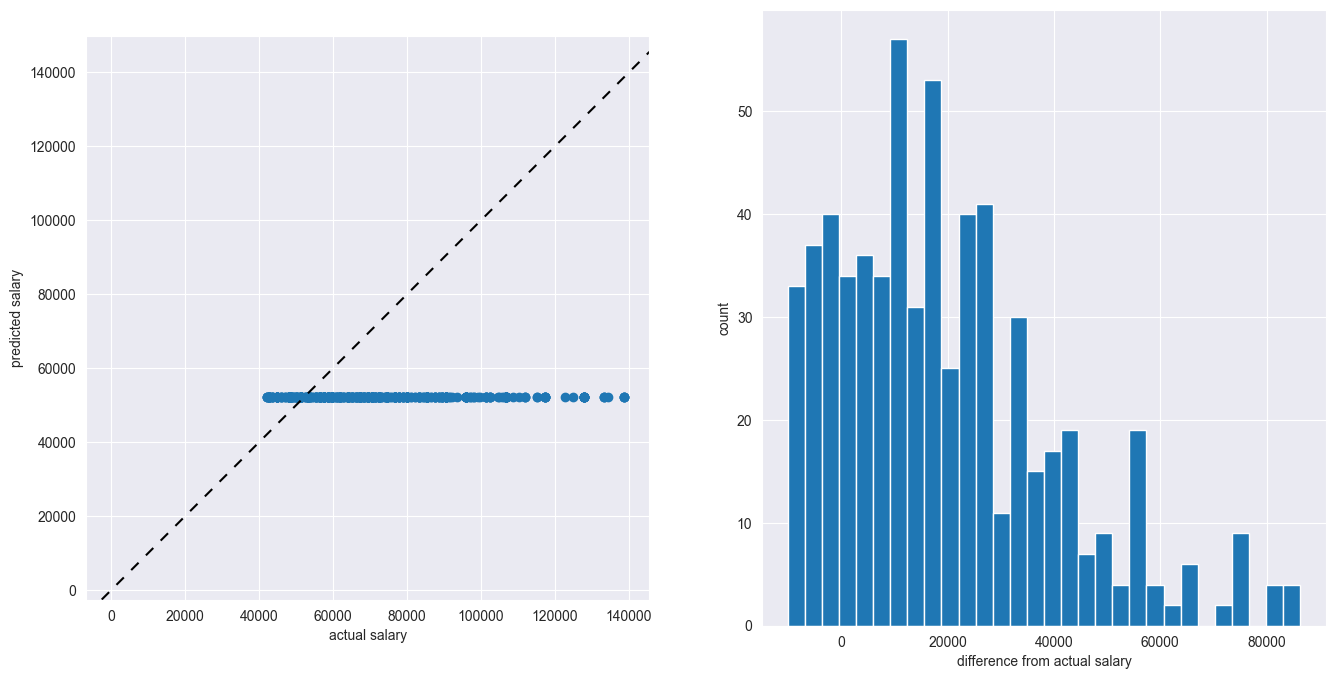

In [6]:
mlp_regressor = MLPRegressor(hidden_layer_sizes=(50, 20, 3), activation='logistic', learning_rate_init=1, max_iter=5000, solver='adam')

mlp_regressor.fit(x_train, y_train)
prediction_mlp = mlp_regressor.predict(x_test)

r2_scores, mae_scores, mape_scores, rmse_scores, max_scores = calc_scores([mlp_regressor], x_test, y_test)
print("Samples:", prediction_mlp[:5])
print("R2:     ", np.round(np.mean(r2_scores), 3))
print("MAE:    ", np.mean(mae_scores).astype(int))
print("MAPE:   ", np.round(np.mean(mape_scores), 3))
print("RMSE:   ", np.mean(rmse_scores).astype(int))
print("MAX:    ", np.max(max_scores).astype(int))

_, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
axs[0].scatter(x=y_test, y=prediction_mlp)
axs[0].axline((0, 0), slope=1, color="black", linestyle=(0, (5, 5)))
axs[0].axis('square')
axs[0].set(xlabel="actual salary", ylabel="predicted salary")
axs[1].set(xlabel="difference from actual salary", ylabel="count")
axs[1].hist((y_test-prediction_mlp), bins=30)
plt.show()

#### Layer Size Example 2

Samples: [69593.76063599 63355.1168554  93455.96780903 61039.28611093
 56791.81566484]
R2:      0.189
MAE:     13969
MAPE:    0.201
RMSE:    18273
MAX:     69423


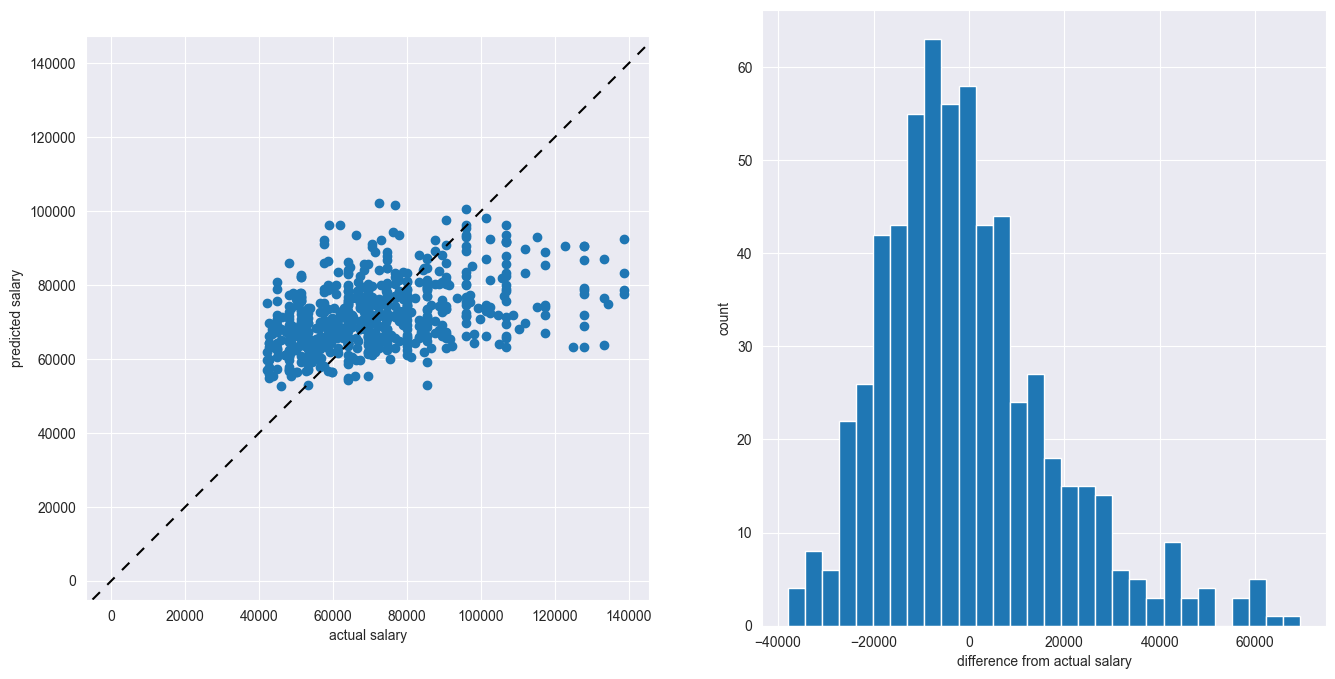

In [7]:
mlp_regressor = MLPRegressor(hidden_layer_sizes=(200, 200, 200, 200), activation='relu', alpha=0.05, learning_rate='adaptive', learning_rate_init=0.1, max_iter=5000, momentum=0.01, solver='adam')

mlp_regressor.fit(x_train, y_train)
prediction_mlp = mlp_regressor.predict(x_test)

r2_scores, mae_scores, mape_scores, rmse_scores, max_scores = calc_scores([mlp_regressor], x_test, y_test)
print("Samples:", prediction_mlp[:5])
print("R2:     ", np.round(np.mean(r2_scores), 3))
print("MAE:    ", np.mean(mae_scores).astype(int))
print("MAPE:   ", np.round(np.mean(mape_scores), 3))
print("RMSE:   ", np.mean(rmse_scores).astype(int))
print("MAX:    ", np.max(max_scores).astype(int))

_, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
axs[0].scatter(x=y_test, y=prediction_mlp)
axs[0].axline((0, 0), slope=1, color="black", linestyle=(0, (5, 5)))
axs[0].axis('square')
axs[0].set(xlabel="actual salary", ylabel="predicted salary")
axs[1].set(xlabel="difference from actual salary", ylabel="count")
axs[1].hist((y_test-prediction_mlp), bins=30)
plt.show()

#### Layer Size Example 3

Samples: [74076.98053469 66992.31204693 75172.83112263 65365.8741215
 65363.22978998]
R2:      0.113
MAE:     14829
MAPE:    0.214
RMSE:    19118
MAX:     64657


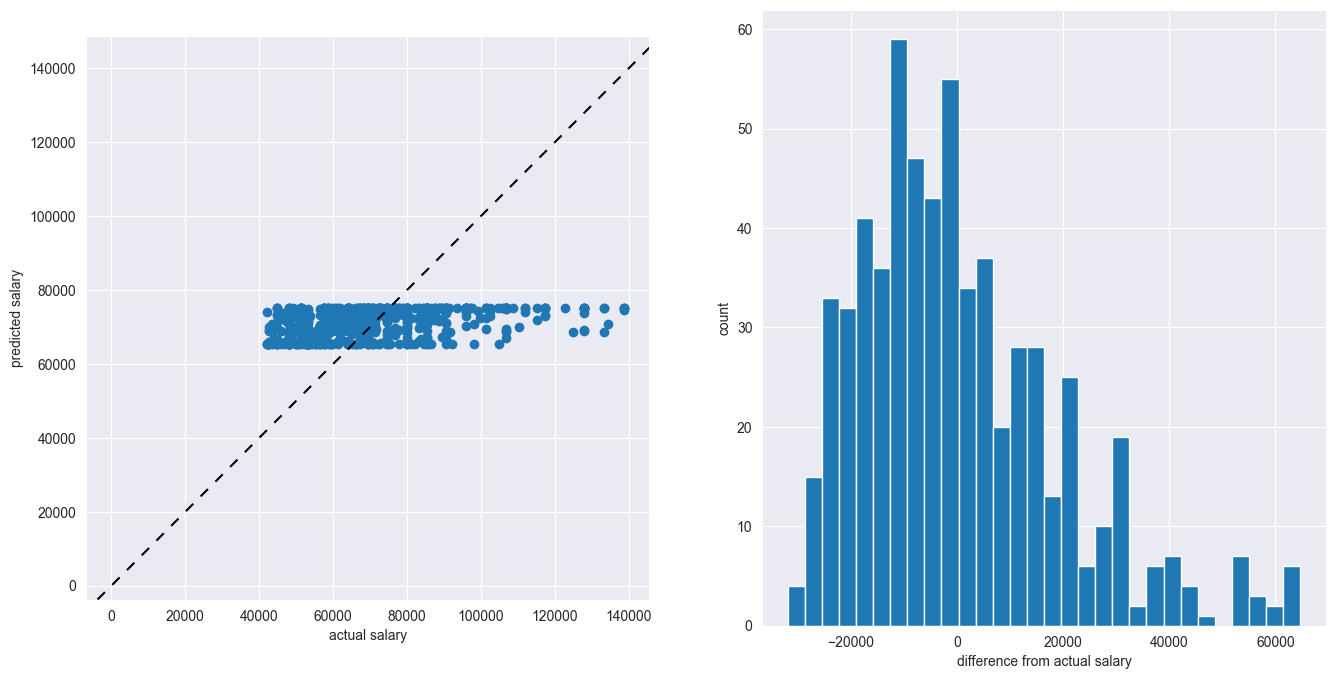

In [8]:
mlp_regressor = MLPRegressor(hidden_layer_sizes=(200,), activation='logistic', alpha=0.05, learning_rate='adaptive', learning_rate_init=0.1, max_iter=5000, momentum=0.01, solver='adam')

mlp_regressor.fit(x_train, y_train)
prediction_mlp = mlp_regressor.predict(x_test)

r2_scores, mae_scores, mape_scores, rmse_scores, max_scores = calc_scores([mlp_regressor], x_test, y_test)
print("Samples:", prediction_mlp[:5])
print("R2:     ", np.round(np.mean(r2_scores), 3))
print("MAE:    ", np.mean(mae_scores).astype(int))
print("MAPE:   ", np.round(np.mean(mape_scores), 3))
print("RMSE:   ", np.mean(rmse_scores).astype(int))
print("MAX:    ", np.max(max_scores).astype(int))

_, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
axs[0].scatter(x=y_test, y=prediction_mlp)
axs[0].axline((0, 0), slope=1, color="black", linestyle=(0, (5, 5)))
axs[0].axis('square')
axs[0].set(xlabel="actual salary", ylabel="predicted salary")
axs[1].set(xlabel="difference from actual salary", ylabel="count")
axs[1].hist((y_test-prediction_mlp), bins=30)
plt.show()

In [9]:
# mlp_regressor = MLPRegressor(random_state=1, max_iter=2000, hidden_layer_sizes=(24, 24, 24))
# mlp_regressor = MLPRegressor(hidden_layer_sizes=(100, ),  activation='tanh', max_iter=5000, learning_rate_init=0.1, verbose=True, random_state=1) # somehow this works
# mlp_regressor = MLPRegressor(hidden_layer_sizes=(150,),  activation='logistic', max_iter=5000, learning_rate_init=0.1, verbose=True, momentum=0.3)
# mlp_regressor = MLPRegressor(hidden_layer_sizes=(100, 100, 100),  activation='tanh', max_iter=5000, learning_rate_init=0.1, verbose=True, random_state=1)
# mlp_regressor = MLPRegressor(hidden_layer_sizes=(24, 24, 24), activation='logistic', solver='sgd', alpha=1, learning_rate='constant', learning_rate_init=0.6, max_iter=40000, momentum=0.3)
# {'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (150,), 'learning_rate': 'adaptive', 'learning_rate_init': 0.1, 'max_iter': 5000, 'momentum': 0.1, 'solver': 'adam'}

In [10]:
# mlp_regressor = MLPRegressor()
# param_grid = {
#     'hidden_layer_sizes': [(250,), (225,), (200,), (175,)],
#     'max_iter': [5000],
#     'activation': ['logistic', 'relu'],
#     'solver': ['adam'],
#     'learning_rate_init': [0.1, 0.3, 0.6, 0.9],
#     'alpha': [0.0001, 0.05],
#     'learning_rate': ['adaptive'],
#     'momentum': [0.001, 0.01, 0.1,]
# }
#
# # param_grid = {
# #     'hidden_layer_sizes': [(150,), (100,), (50,), (20,)],
# #     'max_iter': [5000],
# #     'activation': ['tanh', 'logistic'],
# #     'solver': ['adam'],
# #     'learning_rate_init': [0.1],
# #     'alpha': [0.0001, 0.05, 0.1, 0.3],
# #     'learning_rate': ['constant','adaptive'],
# #     'momentum': [0.1, 0.3, 0.5]
# # }
#
# grid = GridSearchCV(mlp_regressor, param_grid, n_jobs= -1, cv=5)
# grid.fit(x_train, y_train)
#
# print(grid.best_params_)

In [11]:
print(mlp_regressor.coefs_)

[array([[  3.6496445 ,   0.53242241,   3.4613986 ,   3.83146064,
          3.40237274,   4.13577051,   3.42864427,   0.53553239,
          2.50905534,   4.64607291,   4.9050624 ,   3.92439529,
          4.63095993,   3.62888624,   3.63258711,   3.50433295,
          3.20058702,   4.00003382,   3.4745699 ,   3.38329472,
          3.50193008,   3.48809344,   1.37711341,   3.48793395,
          3.49962403,   3.53627161,   3.49843917,   4.16819388,
          6.45134399,   0.45130972,   4.80416027,   3.7521113 ,
          3.61025288,   3.58043035,   3.52856934,   3.42012383,
          3.72454659,   3.59111941,   1.50608331,   3.43083287,
          3.58532824,   3.65924721,   0.39689723,   2.29383425,
          3.49219946,   6.02326155,   3.55008771,   3.53138382,
          3.51329258,   3.42196092,   3.48462148,   3.48589294,
          3.61556782,   5.26164832,   3.49206423,   2.91003422,
          3.68392195,   3.36166061,   3.44526849,   3.5706366 ,
          3.60712269,   3.78823883,   3